In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./lucas_soil_2018.csv")
df.head()

/var/folders/8t/l4w3q1y96ys6mn_9yk43kpfr0000gn/T/ipykernel_86490/1167546493.py:1: DtypeWarning: Columns (6,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./lucas_soil_2018.csv")


,Depth,POINTID,pH_CaCl2,pH_H2O,EC,OC,CaCO3,P,N,K,...,Lucas2015,Lucas2018,Coarse,Clay,Sand,Silt,PSDAvailable,TextureFromSurvey,USDA,ISSS
0,0-20 cm,47862690,4.1,4.81,8.73,12.4,3,< LOD,1.1,101.9,...,YES,YES,2.0,23.0,23.0,54.0,Yes,2009.0,silt loam,silty loam
1,0-20 cm,47882704,4.1,4.93,5.06,16.7,1,< LOD,1.3,51.2,...,YES,YES,6.0,15.0,47.0,38.0,Yes,2009.0,loam,silty loam
2,0-20 cm,47982688,4.1,4.85,12.53,47.5,1,12.3,3.1,114.8,...,YES,YES,4.0,23.0,11.0,66.0,Yes,2009.0,silt loam,silty loam
3,0-20 cm,48022702,5.5,5.80,21.10,28.1,3,< LOD,2,165.8,...,NO,YES,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN
4,0-20 cm,48062708,6.1,6.48,10.89,19.4,2,< LOD,2.2,42.1,...,NO,YES,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN


In [3]:
df.columns

Index(['Depth', 'POINTID', 'pH_CaCl2', 'pH_H2O', 'EC', 'OC', 'CaCO3', 'P', 'N',
       'K', 'OC (20-30 cm)', 'CaCO3 (20-30 cm)', 'Ox_Al', 'Ox_Fe', 'NUTS_0_x',
       'NUTS_1', 'NUTS_2', 'NUTS_3', 'TH_LAT', 'TH_LONG', 'SURVEY_DATE',
       'Elev', 'LC', 'LU', 'LC0_Desc', 'LC1_Desc', 'LU1_Desc', 'NUTS_0_y',
       'Lucas2009', 'Lucas2012', 'Lucas2015', 'Lucas2018', 'Coarse', 'Clay',
       'Sand', 'Silt', 'PSDAvailable', 'TextureFromSurvey', 'USDA', 'ISSS'],
      dtype='object')

In [4]:
df.drop(
    columns=["Lucas2009", "Lucas2015", "Lucas2012", "Lucas2012", "Lucas2018"],
    inplace=True,
)
df.drop(columns=["TextureFromSurvey", "PSDAvailable", "NUTS_0_y"], inplace=True)

df.drop(columns=["SURVEY_DATE"], inplace=True)
df["NUTS_0"] = df["NUTS_0_x"]
df["LC_TYPE"] = df["LC0_Desc"]
df.drop(columns=["NUTS_0_x"], inplace=True)
df.drop(columns=["LC0_Desc"], inplace=True)

df.drop(columns=["POINTID"], inplace=True)
df.drop(columns=["TH_LAT", "TH_LONG"], inplace=True)

print(df.columns)

Index(['Depth', 'pH_CaCl2', 'pH_H2O', 'EC', 'OC', 'CaCO3', 'P', 'N', 'K',
       'OC (20-30 cm)', 'CaCO3 (20-30 cm)', 'Ox_Al', 'Ox_Fe', 'NUTS_1',
       'NUTS_2', 'NUTS_3', 'Elev', 'LC', 'LU', 'LC1_Desc', 'LU1_Desc',
       'Coarse', 'Clay', 'Sand', 'Silt', 'USDA', 'ISSS', 'NUTS_0', 'LC_TYPE'],
      dtype='object')


In [5]:
df.replace("< LOD", np.nan, inplace=True)
df.replace("<  LOD", np.nan, inplace=True)
df.replace("<0.0", np.nan, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18984 entries, 0 to 18983
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Depth             18984 non-null  object 
 1   pH_CaCl2          18983 non-null  float64
 2   pH_H2O            18983 non-null  float64
 3   EC                18975 non-null  float64
 4   OC                18949 non-null  object 
 5   CaCO3             11212 non-null  object 
 6   P                 13981 non-null  object 
 7   N                 18969 non-null  object 
 8   K                 18944 non-null  object 
 9   OC (20-30 cm)     140 non-null    object 
 10  CaCO3 (20-30 cm)  14 non-null     float64
 11  Ox_Al             2510 non-null   float64
 12  Ox_Fe             2510 non-null   float64
 13  NUTS_1            18984 non-null  object 
 14  NUTS_2            18984 non-null  object 
 15  NUTS_3            18984 non-null  object 
 16  Elev              18984 non-null  int64 

In [7]:
df["CaCO3"] = df["CaCO3"].astype(float)
df["P"] = df["P"].astype(float)
df["K"] = df["K"].astype(float)
df["N"] = df["N"].astype(float)

In [8]:
df.describe()

,pH_CaCl2,pH_H2O,EC,CaCO3,P,N,K,CaCO3 (20-30 cm),Ox_Al,Ox_Fe,Elev,Coarse,Clay,Sand,Silt
count,18983.000000,18983.000000,18975.000000,11212.000000,13981.000000,18969.000000,18944.000000,14.000000,2510.000000,2510.000000,18984.000000,16275.000000,16728.000000,16728.000000,16728.000000
mean,5.706427,6.259460,18.389964,96.213566,34.721172,3.154605,204.456638,288.857143,1.171474,2.547171,613.188211,15.694869,19.974773,40.965208,39.055655
std,1.398586,1.319465,25.560630,164.632163,27.546879,3.716608,207.069427,236.021139,1.243111,2.431786,1461.681637,12.815397,13.642703,24.887923,17.497355
min,2.600000,3.340000,0.240000,1.000000,0.300000,0.200000,6.200000,1.000000,0.000000,0.100000,-55.000000,1.000000,0.000000,0.000000,0.000000
25%,4.500000,5.120000,8.095000,1.000000,16.600000,1.300000,85.000000,64.500000,0.600000,1.000000,124.000000,6.000000,9.000000,20.000000,26.000000
50%,5.800000,6.290000,13.950000,5.000000,26.500000,2.000000,153.000000,287.500000,0.900000,1.900000,261.000000,12.000000,18.000000,39.000000,39.000000
75%,7.100000,7.500000,20.600000,123.000000,44.000000,3.400000,261.000000,417.750000,1.300000,3.300000,666.250000,21.000000,28.000000,60.000000,51.000000
max,9.800000,10.430000,1295.600000,926.000000,515.000000,46.500000,7578.800000,702.000000,34.700000,35.800000,11464.000000,98.000000,95.000000,100.000000,93.000000


In [9]:
def grab_col_names(data, cat_th=10, car_th=20):
    # Categorical columns and categorical but high-cardinality columns
    cat_cols = [col for col in data.columns if data[col].dtypes == "O"]
    num_but_cat = [col for col in data.columns if data[col].nunique() < cat_th and data[col].dtypes != "O"]
    high_card_cat_cols = [col for col in data.columns if data[col].nunique() > car_th and data[col].dtypes == "O"]

    # Combine Object type columns and Low-unique-value numeric columns into cat_cols
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in high_card_cat_cols]

    # Numerical columns excluding those considered as categorical
    num_cols = [col for col in data.columns if data[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # Display information about the dataset
    print(f"Observations: {data.shape[0]}")
    print(f"Variables: {data.shape[1]}")
    print(f"Categorical Columns: {len(cat_cols)}")
    print(f"Numerical Columns: {len(num_cols)}")
    print(f"High Cardinality Categorical Columns: {len(high_card_cat_cols)}")
    print(f"Number but Categorical Columns: {len(num_but_cat)}")
    print("\n")

    return cat_cols, num_cols, high_card_cat_cols


cat_cols, num_cols, high_card_cat_cols = grab_col_names(df)
print(f"Catergorical Columns: {cat_cols}")
print(f"Numerical Columns: {num_cols}")
print(f"High Cardinality Categorical Columns: {high_card_cat_cols}")

Observations: 18984
Variables: 29
Categorical Columns: 4
Numerical Columns: 15
High Cardinality Categorical Columns: 10
Number but Categorical Columns: 0


Catergorical Columns: ['Depth', 'USDA', 'ISSS', 'LC_TYPE']
Numerical Columns: ['pH_CaCl2', 'pH_H2O', 'EC', 'CaCO3', 'P', 'N', 'K', 'CaCO3 (20-30 cm)', 'Ox_Al', 'Ox_Fe', 'Elev', 'Coarse', 'Clay', 'Sand', 'Silt']
High Cardinality Categorical Columns: ['OC', 'OC (20-30 cm)', 'NUTS_1', 'NUTS_2', 'NUTS_3', 'LC', 'LU', 'LC1_Desc', 'LU1_Desc', 'NUTS_0']


In [10]:
print(f"Total number of missing values: {df.isnull().sum().sum()}")

Total number of missing values: 97627


In [11]:
print(f"Number of Duplicate Rows: {df.duplicated().sum()}")

Number of Duplicate Rows: 0


In [12]:
categorical_cols = df.select_dtypes(include=["object"]).columns
numerical_cols = df.select_dtypes(include=["float64"]).columns

print("Categorical Columns:", list(categorical_cols))
print("Numerical Columns:", list(numerical_cols))

Categorical Columns: ['Depth', 'OC', 'OC (20-30 cm)', 'NUTS_1', 'NUTS_2', 'NUTS_3', 'LC', 'LU', 'LC1_Desc', 'LU1_Desc', 'USDA', 'ISSS', 'NUTS_0', 'LC_TYPE']
Numerical Columns: ['pH_CaCl2', 'pH_H2O', 'EC', 'CaCO3', 'P', 'N', 'K', 'CaCO3 (20-30 cm)', 'Ox_Al', 'Ox_Fe', 'Coarse', 'Clay', 'Sand', 'Silt']


In [13]:
def my_headmap(data, size):
    if size:
        plt.figure(figsize=size)
    sns.heatmap(data.corr(), annot=True, fmt=".1f", cmap="Blues", annot_kws={"size": 12})
    plt.title("Correlation Matrix")
    plt.show()

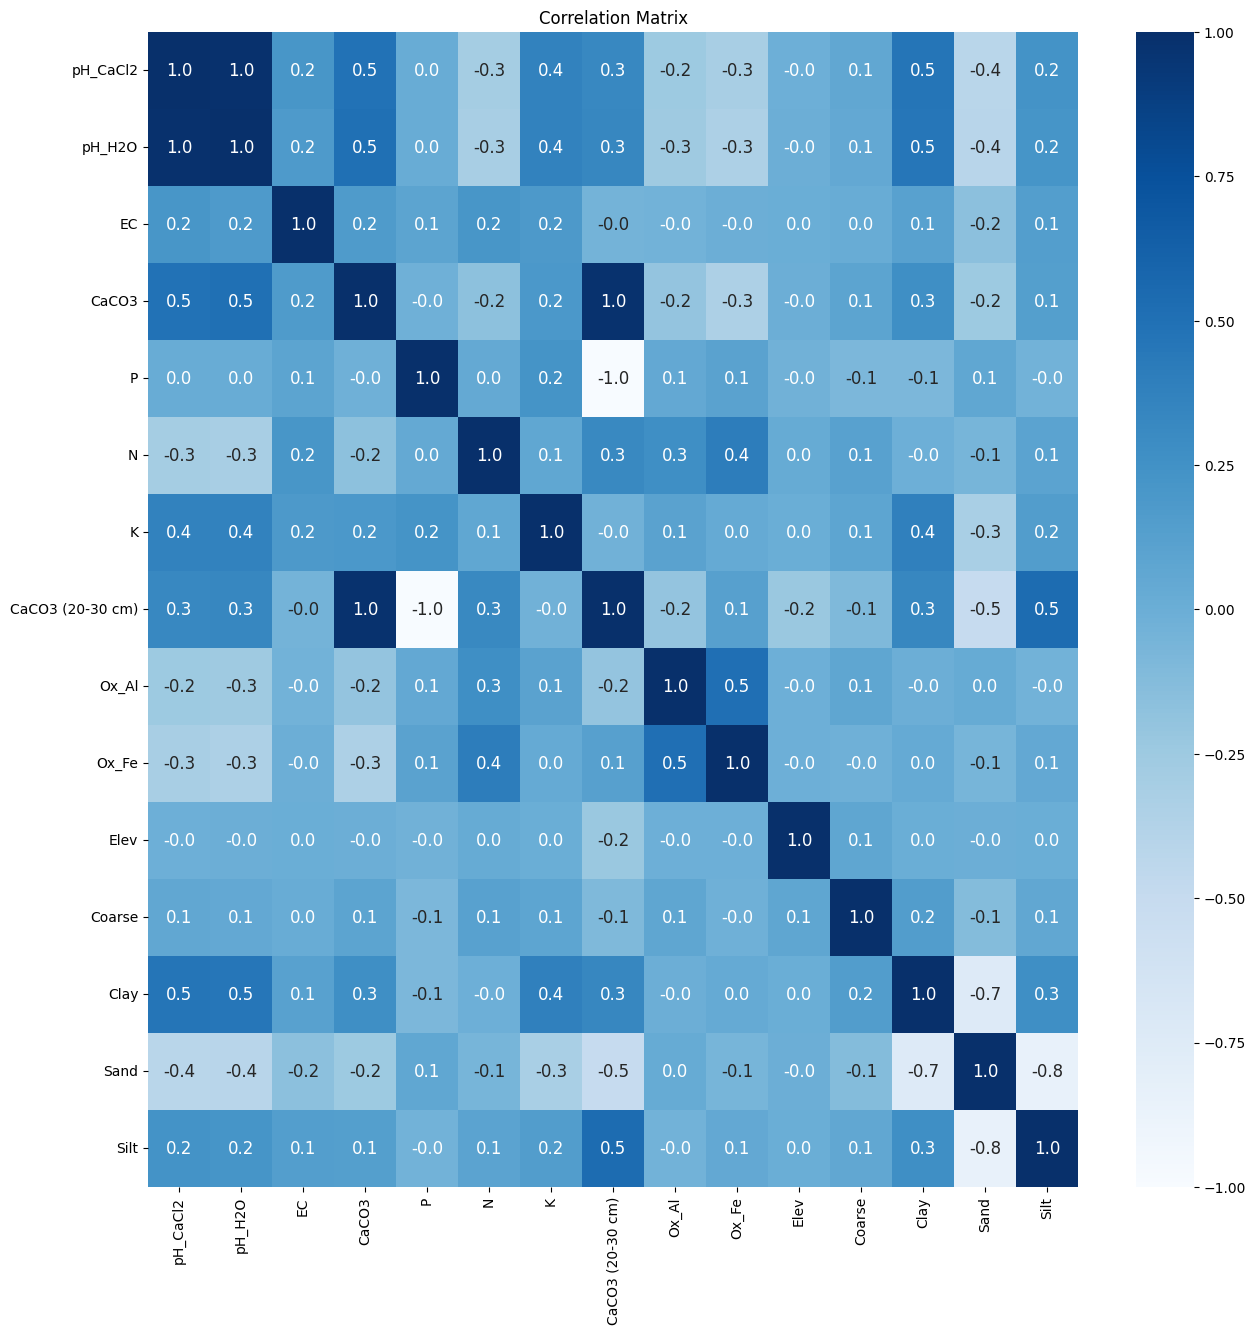

In [14]:
n_numeric_cols = len(numerical_cols)
my_headmap(
    df.select_dtypes(include=[np.number]),
    size=(n_numeric_cols + 1, n_numeric_cols + 1),
)

In [15]:
print(df.isnull().sum())  # Count missing values per column

Depth                   0
pH_CaCl2                1
pH_H2O                  1
EC                      9
OC                     35
CaCO3                7772
P                    5003
N                      15
K                      40
OC (20-30 cm)       18844
CaCO3 (20-30 cm)    18970
Ox_Al               16474
Ox_Fe               16474
NUTS_1                  0
NUTS_2                  0
NUTS_3                  0
Elev                    0
LC                      0
LU                      0
LC1_Desc                0
LU1_Desc                0
Coarse               2709
Clay                 2256
Sand                 2256
Silt                 2256
USDA                 2256
ISSS                 2256
NUTS_0                  0
LC_TYPE                 0
dtype: int64


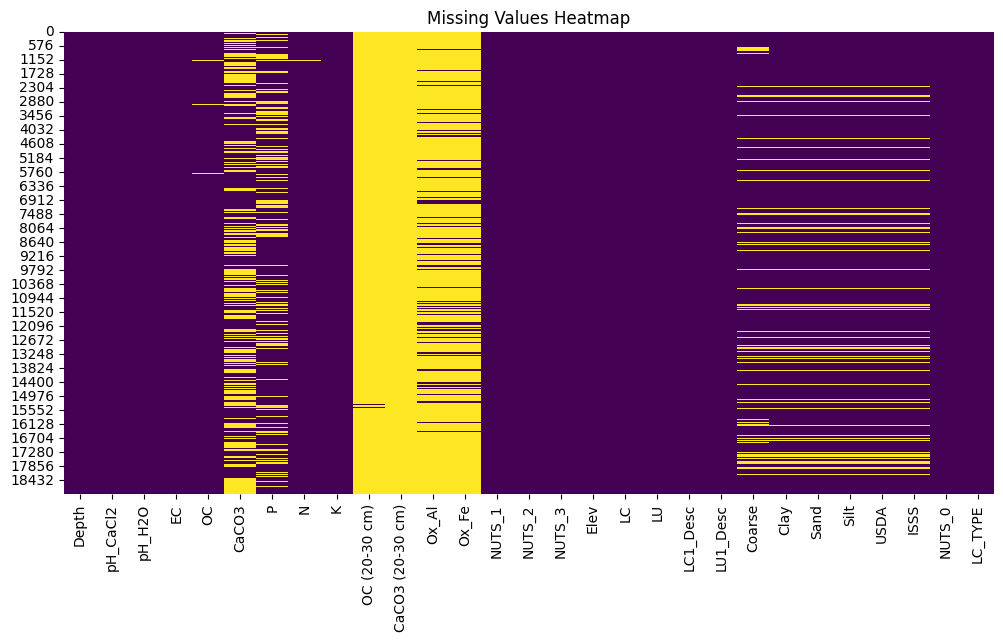

In [16]:
# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [17]:
# Missing values percentage
missing_percentage = df.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0]
missing_percentage = missing_percentage.sort_values(ascending=False)
print("Missing Values Percentage:")
print(missing_percentage)

Missing Values Percentage:
CaCO3 (20-30 cm)    99.926254
OC (20-30 cm)       99.262537
Ox_Fe               86.778340
Ox_Al               86.778340
CaCO3               40.939739
P                   26.353772
Coarse              14.269912
USDA                11.883692
Silt                11.883692
Sand                11.883692
Clay                11.883692
ISSS                11.883692
K                    0.210704
OC                   0.184366
N                    0.079014
EC                   0.047408
pH_H2O               0.005268
pH_CaCl2             0.005268
dtype: float64


In [18]:
def drop_missing_columns(df, threshold=0.8):
    """
    Drops columns from a pandas DataFrame if they have more than a specified percentage of missing values.

    Args:
      df: The pandas DataFrame.
      threshold: The threshold percentage of missing values (e.g., 0.8 for 80%).

    Returns:
      A new pandas DataFrame with the columns dropped.
    """
    missing_percentages = df.isnull().sum() / len(df)
    columns_to_drop = missing_percentages[missing_percentages > threshold].index
    print(columns_to_drop)
    return df.drop(columns=columns_to_drop)


df = drop_missing_columns(df, 0.8)

Index(['OC (20-30 cm)', 'CaCO3 (20-30 cm)', 'Ox_Al', 'Ox_Fe'], dtype='object')


In [19]:
print(f"Remaining columns: {df.columns.tolist()}")


# Fillup missing values
def fill_missing_values(data):
    # Fill missing values for numerical columns with the mean
    numeric_cols = data.select_dtypes(include=["float64"]).columns
    numeric_fill = {col: data[col].mean() for col in numeric_cols}
    data.fillna(numeric_fill, inplace=True)

    # Fill missing values for categorical columns with the mode
    categorical_cols = data.select_dtypes(include=["object"]).columns
    categorical_fill = {col: data[col].mode()[0] for col in categorical_cols}
    data.fillna(categorical_fill, inplace=True)

    return data


df = fill_missing_values(df)
print(df.isnull().sum())  # Count missing values per column


Remaining columns: ['Depth', 'pH_CaCl2', 'pH_H2O', 'EC', 'OC', 'CaCO3', 'P', 'N', 'K', 'NUTS_1', 'NUTS_2', 'NUTS_3', 'Elev', 'LC', 'LU', 'LC1_Desc', 'LU1_Desc', 'Coarse', 'Clay', 'Sand', 'Silt', 'USDA', 'ISSS', 'NUTS_0', 'LC_TYPE']
Depth       0
pH_CaCl2    0
pH_H2O      0
EC          0
OC          0
CaCO3       0
P           0
N           0
K           0
NUTS_1      0
NUTS_2      0
NUTS_3      0
Elev        0
LC          0
LU          0
LC1_Desc    0
LU1_Desc    0
Coarse      0
Clay        0
Sand        0
Silt        0
USDA        0
ISSS        0
NUTS_0      0
LC_TYPE     0
dtype: int64


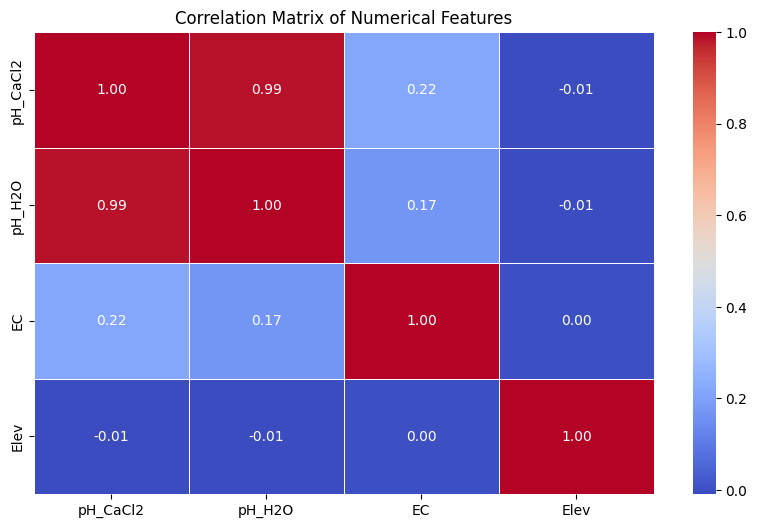

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df[["pH_CaCl2", "pH_H2O", "EC", "Elev"]].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


          Depth      Ratio
Depth                     
0-20 cm   18744  98.735777
0-10 cm     231   1.216814
10-20 cm      8   0.042141
20-30 cm      1   0.005268




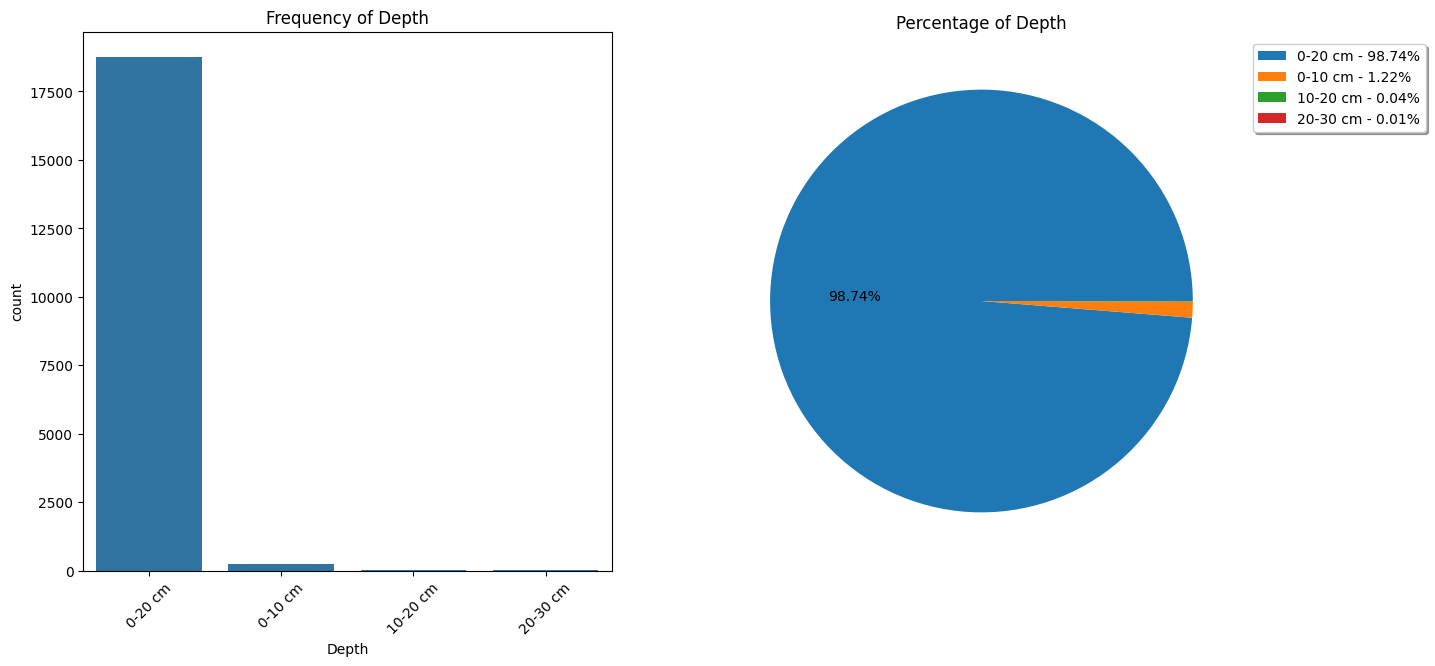

                 USDA      Ratio
USDA                            
sandy loam       6104  32.153392
silt loam        3260  17.172356
loam             3244  17.088074
silty clay loam  1465   7.717025
clay loam        1164   6.131479
loamy sand       1101   5.799621
clay              850   4.477455
sand              685   3.608302
silty clay        610   3.213232
sandy clay loam   376   1.980615
silt              108   0.568900
sandy clay         17   0.089549




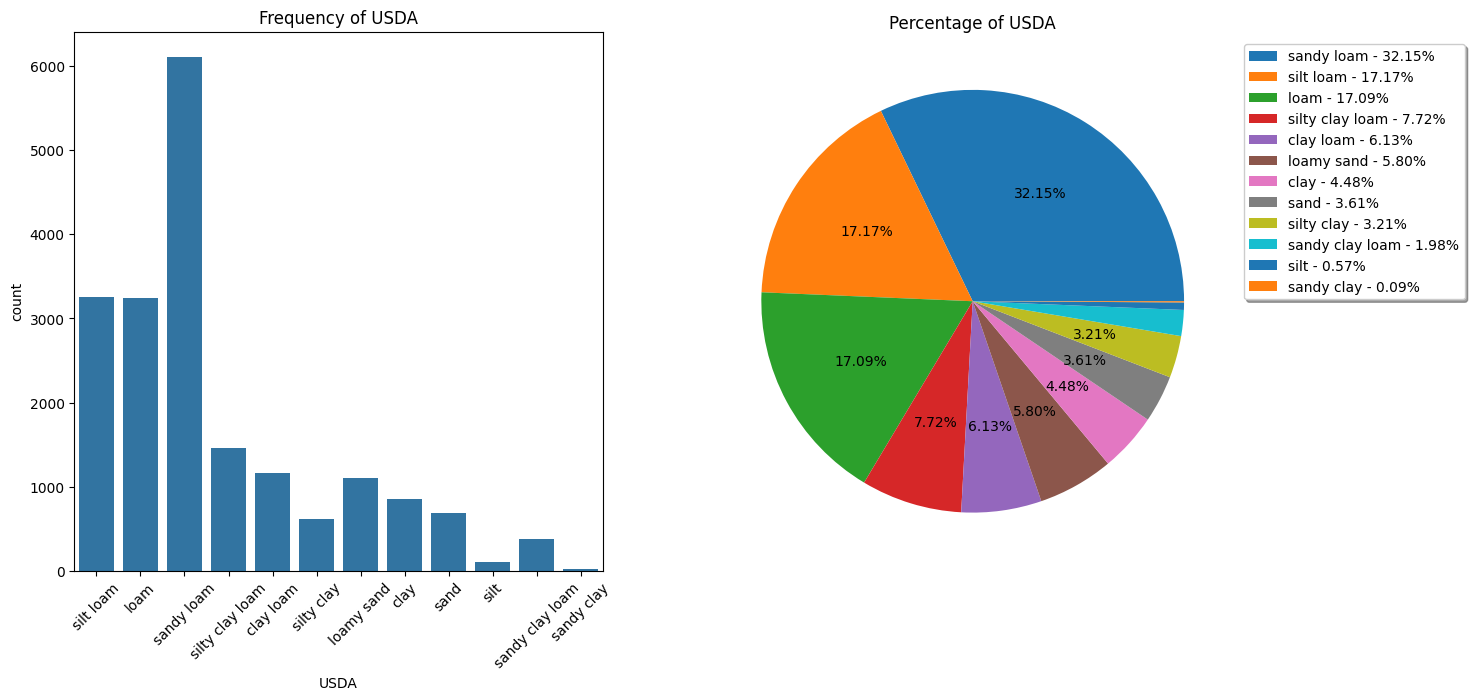

                  ISSS      Ratio
ISSS                             
silty loam       11165  58.812684
silty clay loam   2895  15.249684
loamy sand        2158  11.367467
silty clay        1243   6.547619
loam               686   3.613569
sand               372   1.959545
clay               243   1.280025
clay loam          170   0.895491
sandy loam          49   0.258112
sandy clay loam      3   0.015803




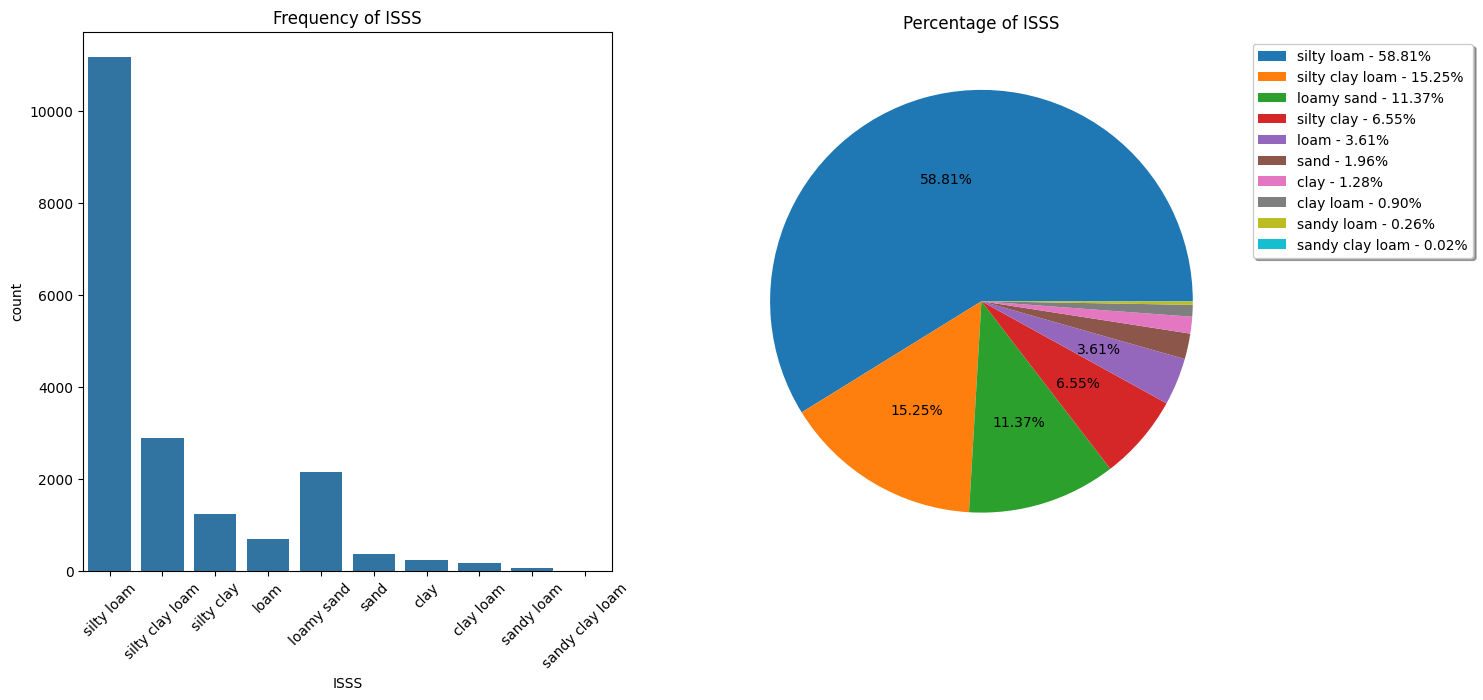

                 LC_TYPE      Ratio
LC_TYPE                            
Cropland            7430  39.138222
Woodland            6092  32.090181
Grassland           3988  21.007164
Shrubland            720   3.792668
Bareland             638   3.360725
Artificial land       71   0.373999
Wetlands              40   0.210704
Water                  5   0.026338




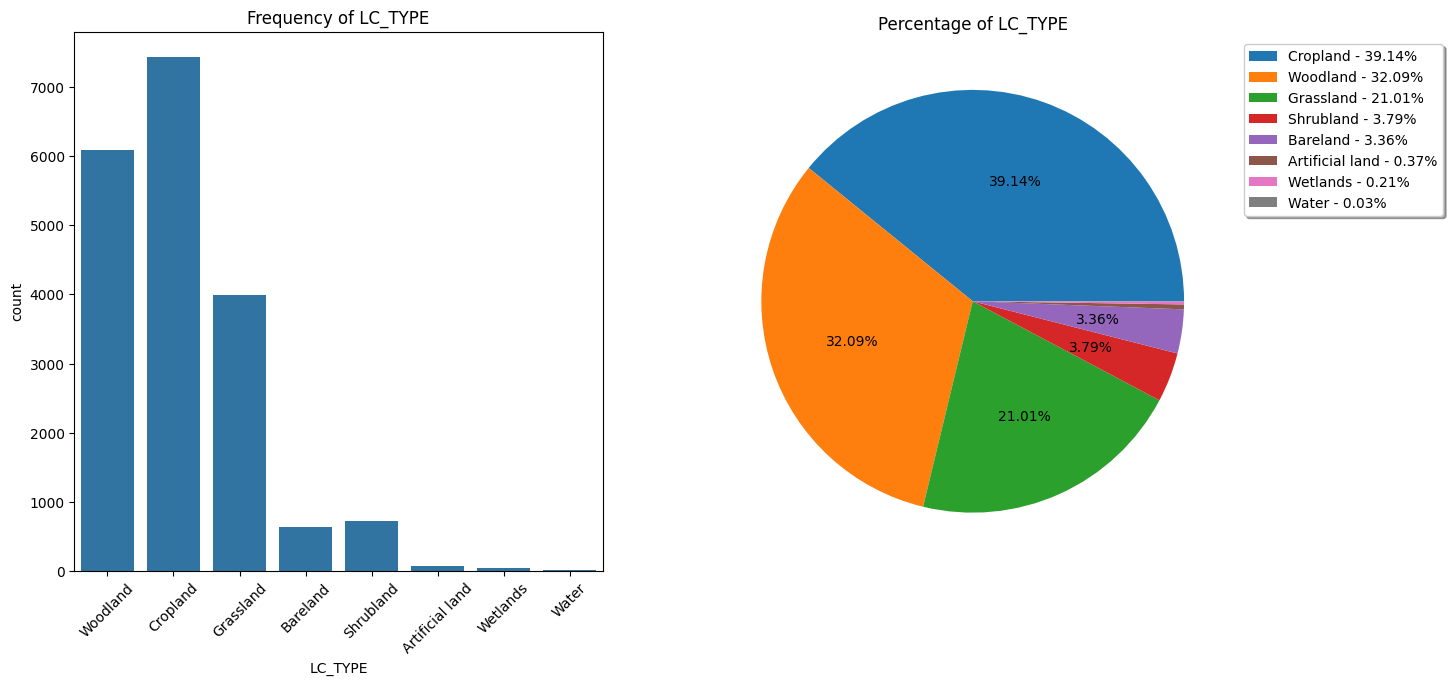

In [21]:
def cat_summary(data, col, plot=False):
    print(
        pd.DataFrame(
            {
                col: data[col].value_counts(),
                "Ratio": data[col].value_counts() / len(data) * 100,
            }
        )
    )
    print("\n")

    if plot:
        fig, axs = plt.subplots(1, 2, figsize=(15, 7))
        plt.subplot(1, 2, 1)
        sns.countplot(x=col, data=data)
        plt.xticks(rotation=45)
        plt.title(f"Frequency of {col}")

        plt.subplot(1, 2, 2)
        values = data[col].value_counts()
        plt.pie(
            x=values,
            labels=None,  # No direct labels
            autopct=lambda x: "{:.2f}%".format(x) if x > 3 else "",  # Only show percentages for larger slices
        )
        plt.legend(
            labels=[
                "{} - {:.2f}%".format(index, value / sum(values) * 100) for index, value in zip(values.index, values)
            ],
            loc="upper left",
            bbox_to_anchor=(1, 1),
            fancybox=True,
            shadow=True,
            ncol=1,
        )
        plt.title(f"Percentage of {col}")
        plt.show(block=True)


for col in cat_cols:
    cat_summary(df, col, True)

In [22]:
categorical_cols = df.select_dtypes(include=["object"]).columns
numerical_cols = df.select_dtypes(include=["float64"]).columns

print("Categorical Columns:", list(categorical_cols))
print("Numerical Columns:", list(numerical_cols))

Categorical Columns: ['Depth', 'OC', 'NUTS_1', 'NUTS_2', 'NUTS_3', 'LC', 'LU', 'LC1_Desc', 'LU1_Desc', 'USDA', 'ISSS', 'NUTS_0', 'LC_TYPE']
Numerical Columns: ['pH_CaCl2', 'pH_H2O', 'EC', 'CaCO3', 'P', 'N', 'K', 'Coarse', 'Clay', 'Sand', 'Silt']


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18984 entries, 0 to 18983
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Depth     18984 non-null  object 
 1   pH_CaCl2  18984 non-null  float64
 2   pH_H2O    18984 non-null  float64
 3   EC        18984 non-null  float64
 4   OC        18984 non-null  object 
 5   CaCO3     18984 non-null  float64
 6   P         18984 non-null  float64
 7   N         18984 non-null  float64
 8   K         18984 non-null  float64
 9   NUTS_1    18984 non-null  object 
 10  NUTS_2    18984 non-null  object 
 11  NUTS_3    18984 non-null  object 
 12  Elev      18984 non-null  int64  
 13  LC        18984 non-null  object 
 14  LU        18984 non-null  object 
 15  LC1_Desc  18984 non-null  object 
 16  LU1_Desc  18984 non-null  object 
 17  Coarse    18984 non-null  float64
 18  Clay      18984 non-null  float64
 19  Sand      18984 non-null  float64
 20  Silt      18984 non-null  fl

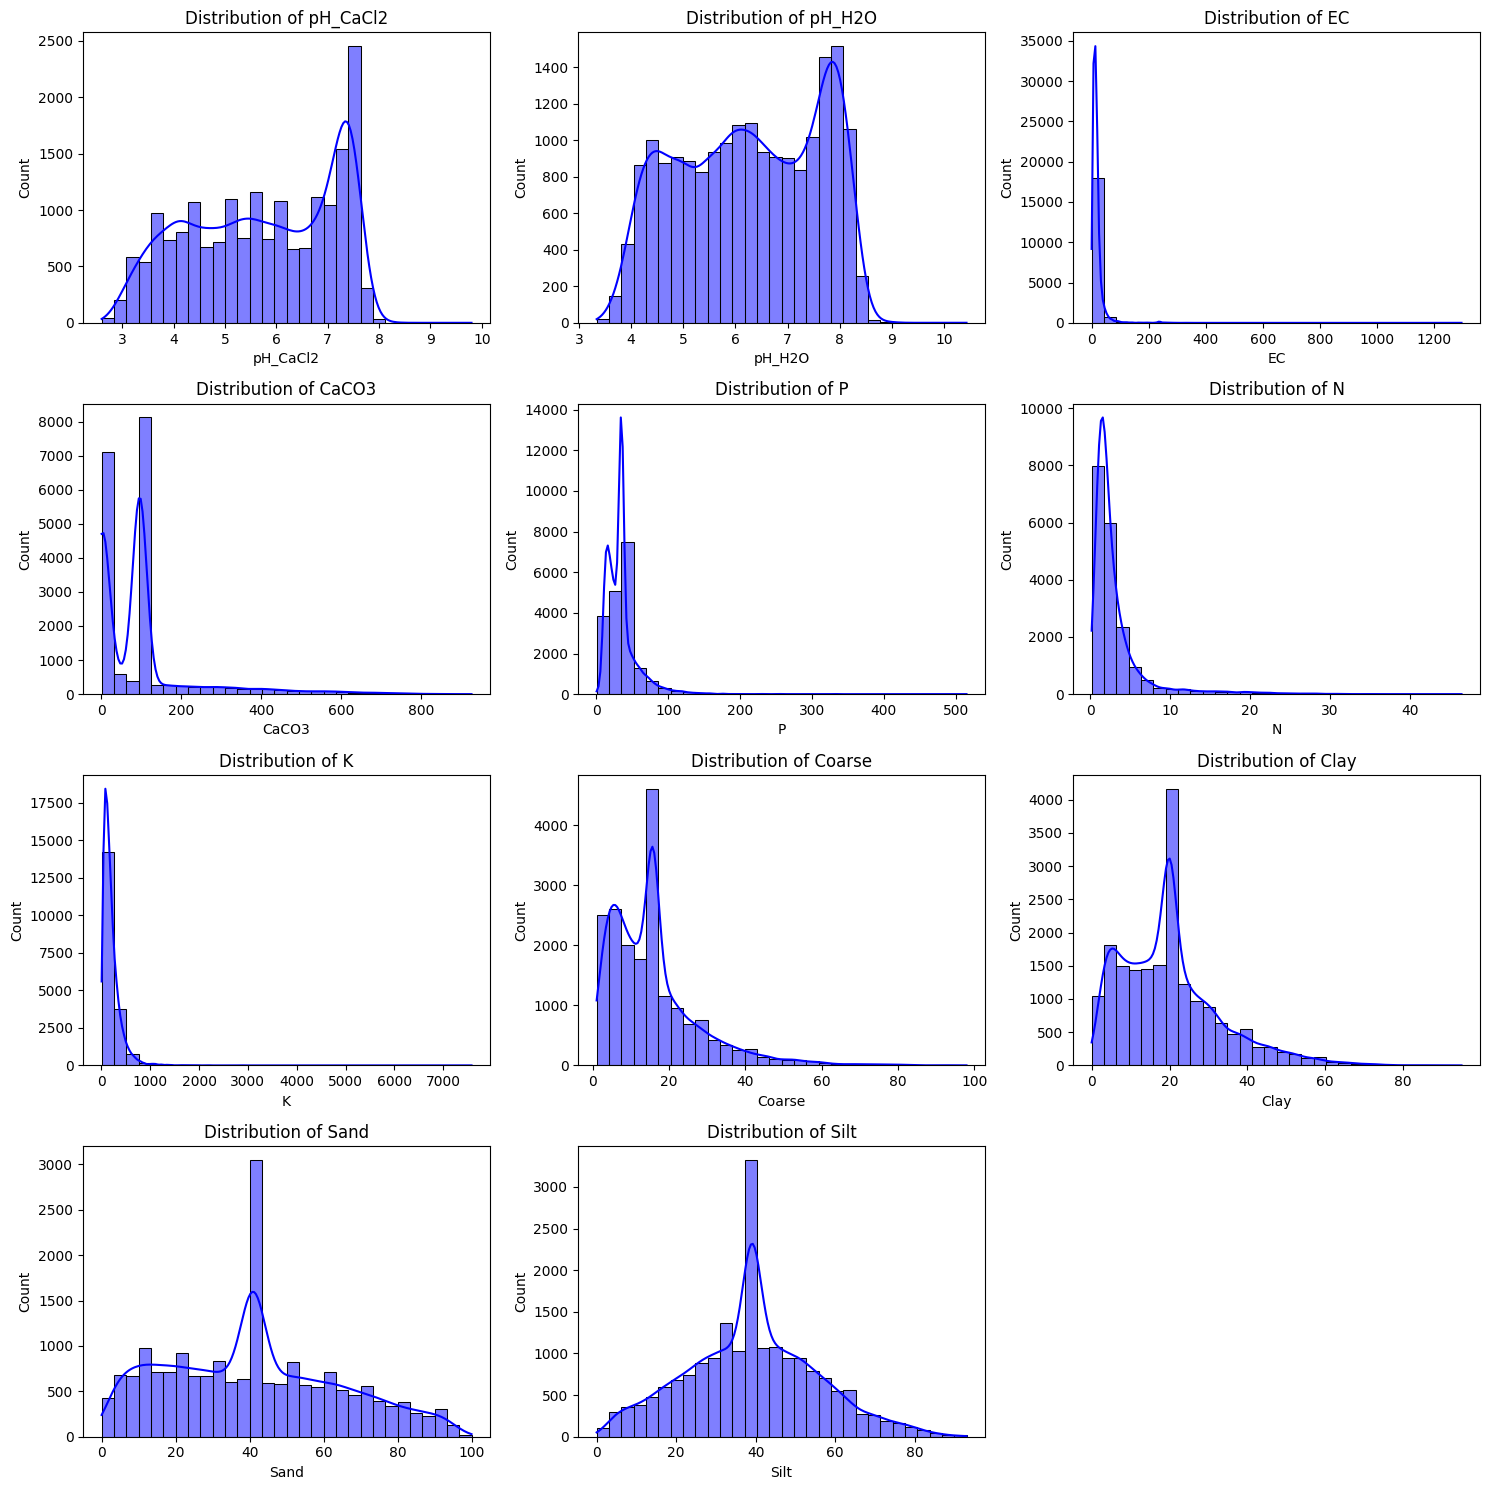

In [24]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot((len(numerical_cols) + 2) // 3, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color="blue")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

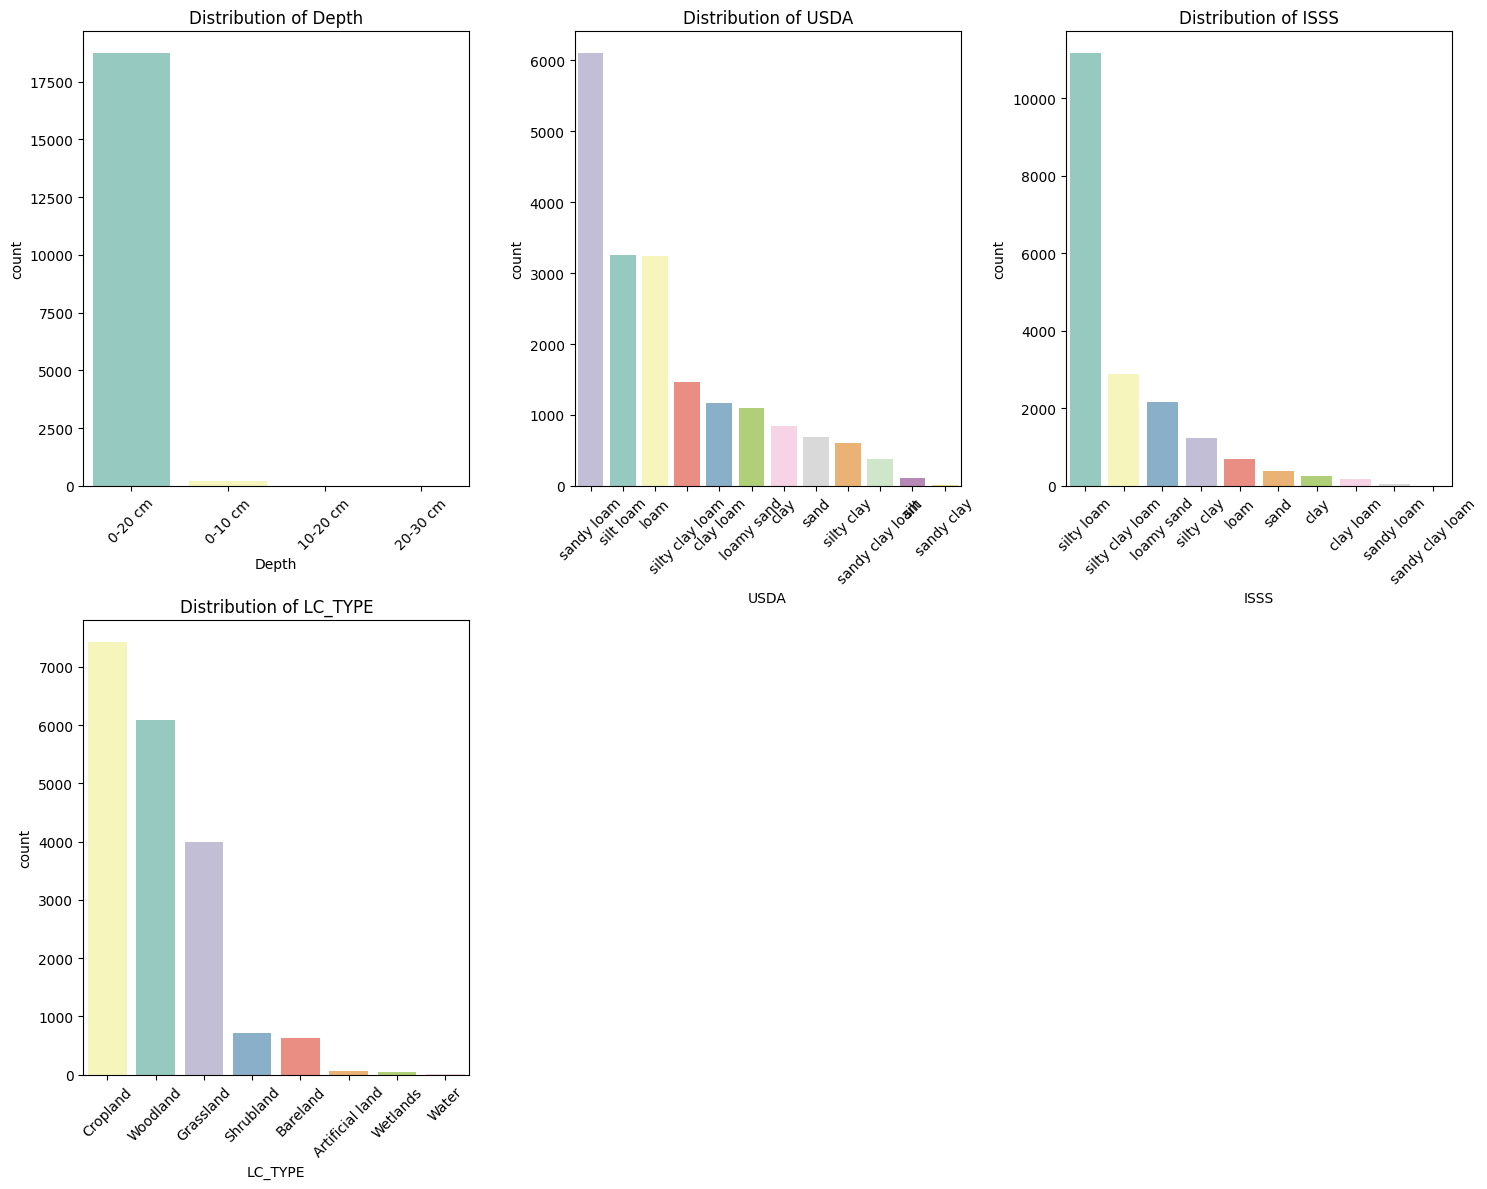

In [25]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(cat_cols, 1):
    plt.subplot((len(cat_cols) + 2) // 3, 3, i)
    sns.countplot(data=df, x=col, hue=col, palette="Set3", order=df[col].value_counts().index, legend=False)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
# Label encoding for categorical columns
from sklearn.preprocessing import LabelEncoder


def label_encode(data):
    le = LabelEncoder()
    for col in data.select_dtypes(include=["object"]).columns:
        print(f"Encoding {col}...")
        data[col] = le.fit_transform(data[col])
    return data


df = label_encode(df)
print(df.head())

Encoding Depth...
Encoding OC...
Encoding NUTS_1...
Encoding NUTS_2...
Encoding NUTS_3...
Encoding LC...
Encoding LU...
Encoding LC1_Desc...
Encoding LU1_Desc...
Encoding USDA...
Encoding ISSS...
Encoding NUTS_0...
Encoding LC_TYPE...
   Depth  pH_CaCl2  pH_H2O     EC    OC  CaCO3          P    N      K  NUTS_1  \
0      1       4.1    4.81   8.73   186    3.0  34.721172  1.1  101.9       0   
1      1       4.1    4.93   5.06   455    1.0  34.721172  1.3   51.2       0   
2      1       4.1    4.85  12.53  1533    1.0  12.300000  3.1  114.8       0   
3      1       5.5    5.80  21.10   932    3.0  34.721172  2.0  165.8       0   
4      1       6.1    6.48  10.89   605    2.0  34.721172  2.2   42.1       0   

   ...  LC1_Desc  LU1_Desc     Coarse       Clay       Sand       Silt  USDA  \
0  ...        32        12   2.000000  23.000000  23.000000  54.000000     9   
1  ...        55        12   6.000000  15.000000  47.000000  38.000000     2   
2  ...        36        12   4.000000 

In [27]:
from sklearn.model_selection import train_test_split

# Split the dataset into features and target variable
X = df.drop(columns=["pH_H2O", "pH_CaCl2"])
y = df["pH_H2O"]
print("Features shape:", X.shape)
print("Target shape:", y.shape)
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Features shape: (18984, 23)
Target shape: (18984,)
X_train shape: (15187, 23)
X_test shape: (3797, 23)
y_train shape: (15187,)
y_test shape: (3797,)


Test RMSE: 0.5077


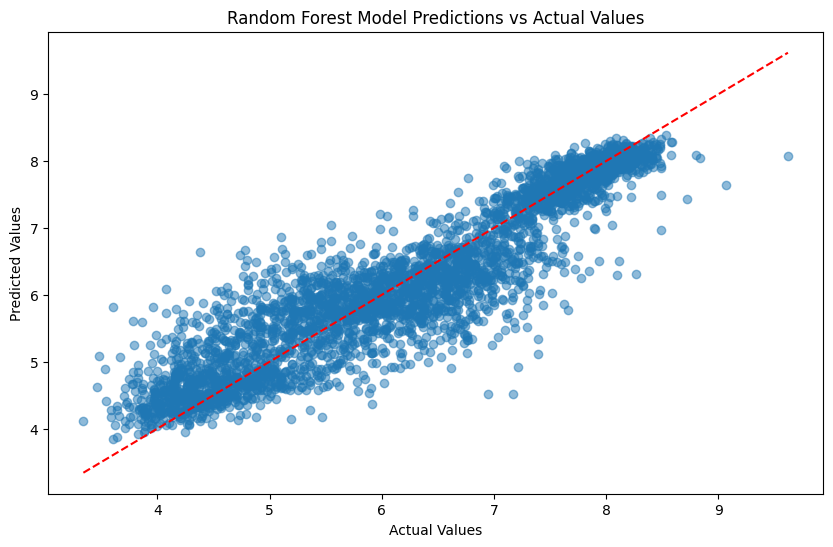

Test RMSE: 0.7186


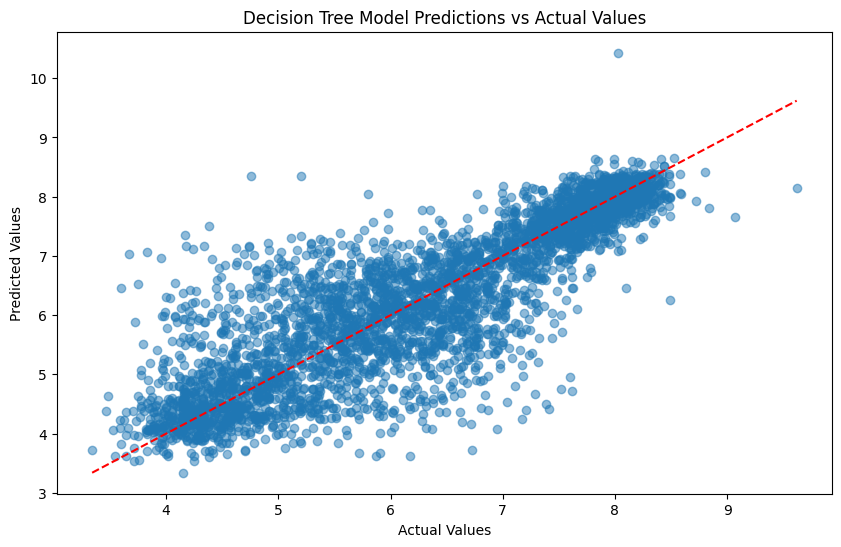

Test RMSE: 0.5132


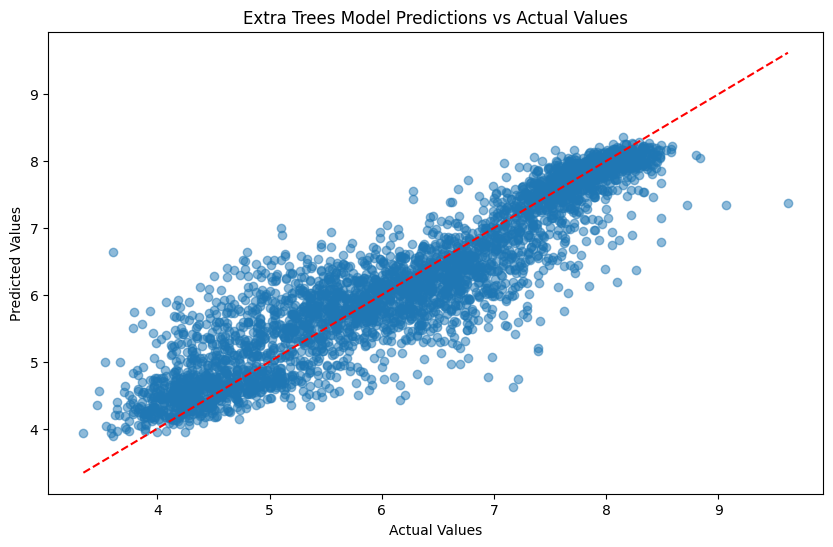

Test RMSE: 0.5044


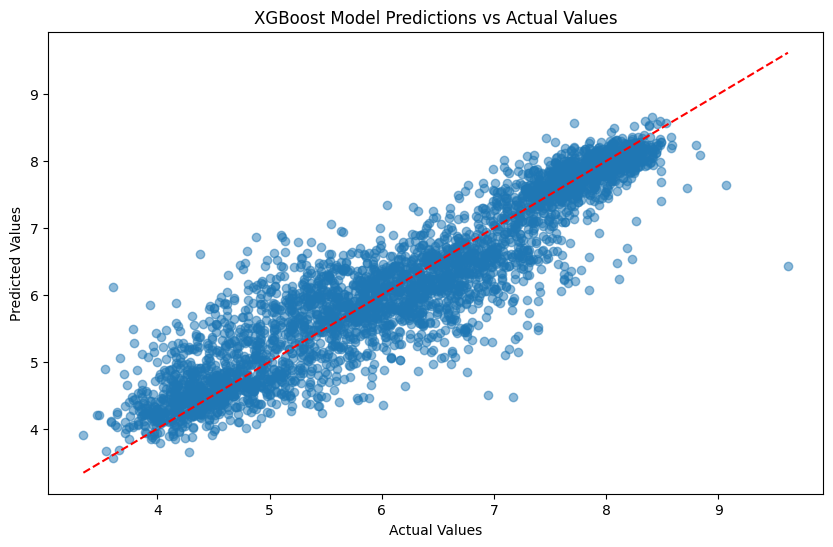

Learning rate set to 0.062929
0:	learn: 1.2535601	total: 60.2ms	remaining: 1m
1:	learn: 1.1979028	total: 62.5ms	remaining: 31.2s
2:	learn: 1.1465931	total: 64.7ms	remaining: 21.5s
3:	learn: 1.0973620	total: 67.2ms	remaining: 16.7s
4:	learn: 1.0537536	total: 69.5ms	remaining: 13.8s
5:	learn: 1.0137275	total: 71.8ms	remaining: 11.9s
6:	learn: 0.9767941	total: 74.2ms	remaining: 10.5s
7:	learn: 0.9404798	total: 76.6ms	remaining: 9.5s
8:	learn: 0.9100341	total: 78.9ms	remaining: 8.69s
9:	learn: 0.8808057	total: 81ms	remaining: 8.02s
10:	learn: 0.8536421	total: 83.8ms	remaining: 7.54s
11:	learn: 0.8287368	total: 86.3ms	remaining: 7.1s
12:	learn: 0.8072851	total: 88.4ms	remaining: 6.71s
13:	learn: 0.7847721	total: 91ms	remaining: 6.41s
14:	learn: 0.7655209	total: 94.1ms	remaining: 6.18s
15:	learn: 0.7494812	total: 96.5ms	remaining: 5.94s
16:	learn: 0.7330394	total: 98.8ms	remaining: 5.71s
17:	learn: 0.7190845	total: 101ms	remaining: 5.5s
18:	learn: 0.7052262	total: 103ms	remaining: 5.32s
19:	

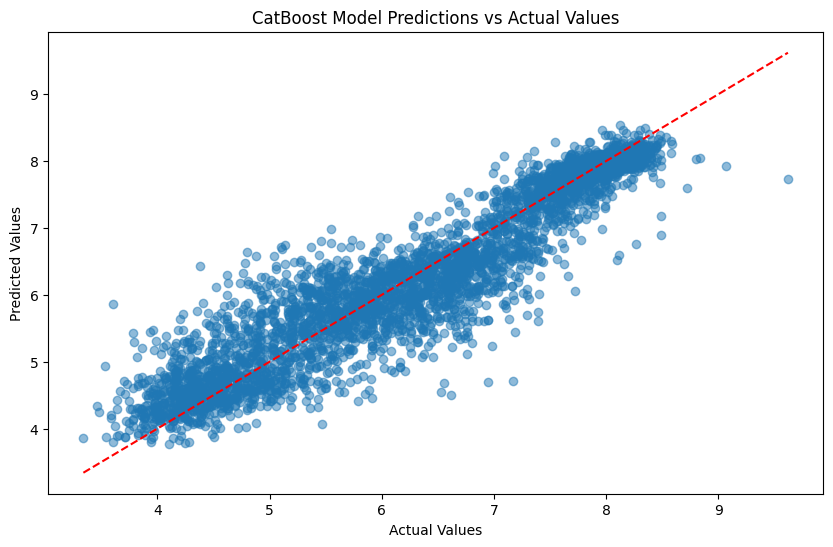

In [28]:
# Model training
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
import xgboost as xgb

# Define the models
models = {
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Extra Trees": ExtraTreesRegressor(),
    "XGBoost": xgb.XGBRegressor(),
    "CatBoost": CatBoostRegressor(),
}
# Initialize a dictionary to store the results
results = {}
# Iterate through the models
for model_name, model in models.items():
    # Create a pipeline with preprocessing and the model
    pipeline = Pipeline(
        [
            (
                "preprocessor",
                ColumnTransformer(
                    transformers=[
                        (
                            "num",
                            StandardScaler(),
                            X.select_dtypes(include=["float64"]).columns,
                        ),
                        (
                            "cat",
                            "passthrough",
                            X.select_dtypes(include=["int64"]).columns,
                        ),
                    ]
                ),
            ),
            ("model", model),
        ]
    )

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Test RMSE: {rmse:.4f}")
    # Plot predictions vs actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{model_name} Model Predictions vs Actual Values")
    plt.show()

    # Store the results
    results[model_name] = {"MSE": mse, "R2": r2, "RMSE": rmse}

Model Performance:
Random Forest: MSE = 0.2578, R2 = 0.8551
Decision Tree: MSE = 0.5164, R2 = 0.7097
Extra Trees: MSE = 0.2634, R2 = 0.8520
XGBoost: MSE = 0.2544, R2 = 0.8570
CatBoost: MSE = 0.2288, R2 = 0.8714


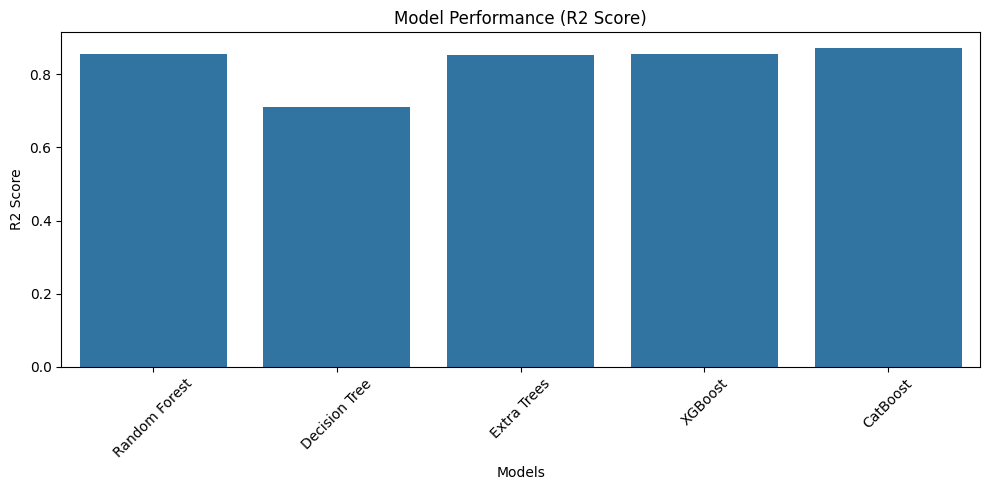

In [29]:
print("Model Performance:")
for model_name, metrics in results.items():
    print(f"{model_name}: MSE = {metrics['MSE']:.4f}, R2 = {metrics['R2']:.4f}")

# Visualize the results
plt.figure(figsize=(10, 5))
sns.barplot(
    x=list(results.keys()),
    y=[metrics["R2"] for metrics in results.values()],
)
plt.title("Model Performance (R2 Score)")
plt.ylabel("R2 Score")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

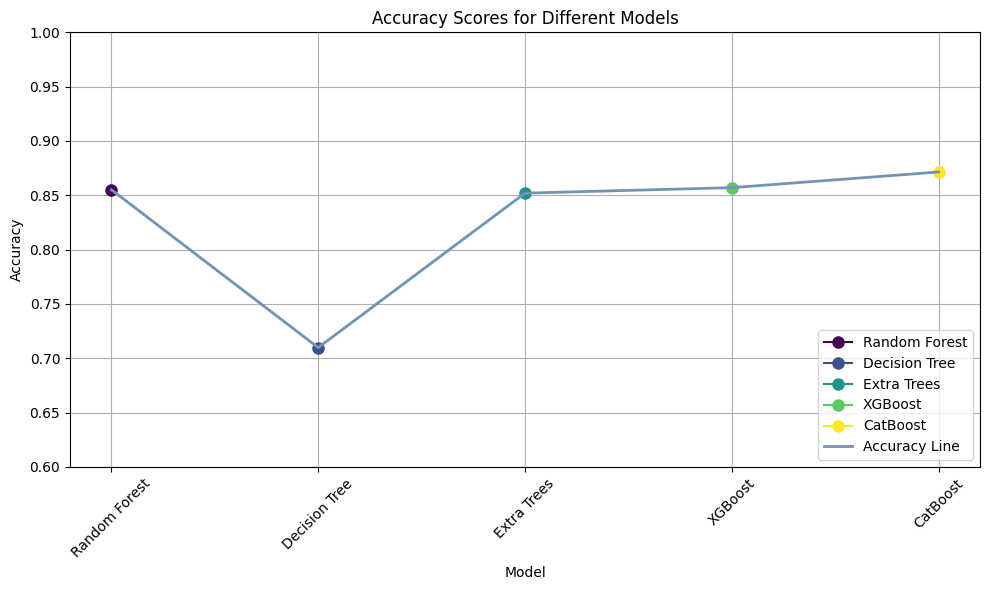

In [30]:
import matplotlib.cm as cm

# Assuming 'scores' DataFrame has columns 'Model' and 'Accuracy'
models = results.keys()
accuracy = [results[model]["R2"] for model in results.keys()]

# Generate a color map
colors = cm.viridis(np.linspace(0, 1, len(models)))

# Plotting the accuracy points with color for each model
plt.figure(figsize=(10, 6))
for i, (model, acc) in enumerate(zip(models, accuracy)):
    plt.plot(model, acc, marker="o", color=colors[i], markersize=8, label=model)

# Adding a line that passes through the points
plt.plot(models, accuracy, linestyle="-", color="#7393B3", linewidth=2, label="Accuracy Line")

# Customizing the plot
plt.title("Accuracy Scores for Different Models")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0.60, 1)
plt.xticks(rotation=45)
plt.grid(True)

# Display the plot with legend at the bottom right
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))  # Remove duplicate labels
plt.legend(unique_labels.values(), unique_labels.keys(), loc="lower right")

# Show the plot
plt.tight_layout()
plt.show()

In [31]:
# Table of the results
results_df = pd.DataFrame(results)
results_df.to_csv("results.csv", index=False)
results_df


,Random Forest,Decision Tree,Extra Trees,XGBoost,CatBoost
MSE,0.257768,0.516409,0.263374,0.254395,0.228756
R2,0.855118,0.709745,0.851967,0.857014,0.871425
RMSE,0.507709,0.718616,0.513200,0.504376,0.478284


In [32]:
# Get the best model
best_model = max(results, key=lambda x: results[x]["R2"])
print(f"Best Model: {best_model}")


Best Model: CatBoost


In [33]:
cat = CatBoostRegressor(n_estimators=100)
cat.fit(X_train, y_train)

Learning rate set to 0.409121
0:	learn: 0.9543633	total: 4.1ms	remaining: 406ms
1:	learn: 0.7602534	total: 7.62ms	remaining: 373ms
2:	learn: 0.6618649	total: 10.8ms	remaining: 351ms
3:	learn: 0.6210903	total: 14.6ms	remaining: 350ms
4:	learn: 0.5847644	total: 17.8ms	remaining: 338ms
5:	learn: 0.5665954	total: 20.8ms	remaining: 326ms
6:	learn: 0.5533397	total: 23.9ms	remaining: 318ms
7:	learn: 0.5472034	total: 26.7ms	remaining: 307ms
8:	learn: 0.5390819	total: 30ms	remaining: 303ms
9:	learn: 0.5348062	total: 33ms	remaining: 297ms
10:	learn: 0.5296908	total: 35.5ms	remaining: 287ms
11:	learn: 0.5248179	total: 37.6ms	remaining: 276ms
12:	learn: 0.5215848	total: 39.7ms	remaining: 266ms
13:	learn: 0.5164797	total: 41.8ms	remaining: 257ms
14:	learn: 0.5125935	total: 43.9ms	remaining: 249ms
15:	learn: 0.5099578	total: 46.4ms	remaining: 244ms
16:	learn: 0.5070681	total: 83.2ms	remaining: 406ms
17:	learn: 0.5030533	total: 85.4ms	remaining: 389ms
18:	learn: 0.5006785	total: 87.4ms	remaining: 373

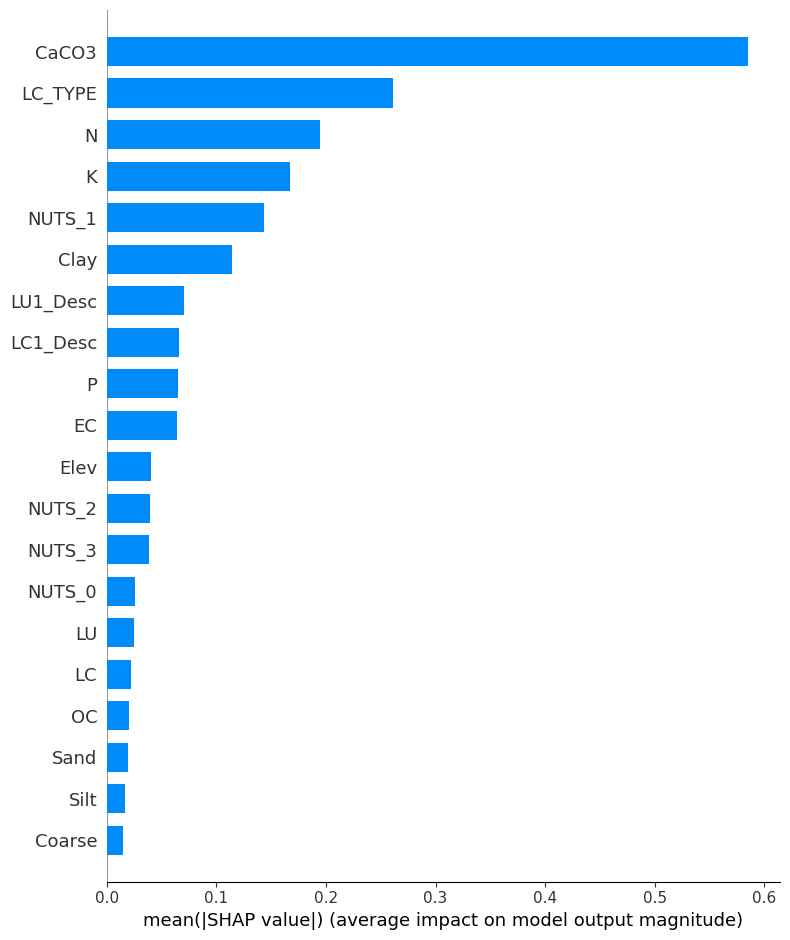

 Feature  SHAP Value  Percentage
   CaCO3    0.585233   29.303087
 LC_TYPE    0.261524   13.094727
       N    0.194677    9.747658
       K    0.167234    8.373524
  NUTS_1    0.143094    7.164826
    Clay    0.114217    5.718934
LU1_Desc    0.069979    3.503895
LC1_Desc    0.065726    3.290932
       P    0.064881    3.248654
      EC    0.063540    3.181507
    Elev    0.040227    2.014199
  NUTS_2    0.039600    1.982809
  NUTS_3    0.038240    1.914725
  NUTS_0    0.025827    1.293192
      LU    0.024641    1.233797
      LC    0.021569    1.080001
      OC    0.020052    1.004012
    Sand    0.019161    0.959424
    Silt    0.016614    0.831883
  Coarse    0.014745    0.738292
    ISSS    0.004801    0.240410
    USDA    0.001588    0.079512
   Depth    0.000000    0.000000


In [34]:
# Shap based feature importance
import shap

explainer = shap.Explainer(cat)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Get mean absolute SHAP values for each feature
shap_importance = pd.DataFrame({"Feature": X_train.columns, "SHAP Value": shap_values.abs.mean(axis=0).values})

# Convert SHAP values to percentage
shap_importance["Percentage"] = 100 * shap_importance["SHAP Value"] / shap_importance["SHAP Value"].sum()

# Sort by importance
shap_importance = shap_importance.sort_values(by="SHAP Value", ascending=False)

# Print as a table
print(shap_importance.to_string(index=False))


In [35]:
shap.summary_plot(shap_values[0], X_test)

AssertionError: Summary plots need a matrix of shap_values, not a vector.

<Figure size 640x480 with 0 Axes>

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

num_features = X_train.shape[1]
print(f"Number of features: {num_features}")

# callbacks
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

# Define MLP model
model = Sequential(
    [
        Dense(256, activation="relu", input_shape=(X_train.shape[1],), kernel_regularizer="l2"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(128, activation="relu", kernel_regularizer="l2"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation="relu", kernel_regularizer="l2"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1, activation="linear"),  # Output for regression
    ]
)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss="mse", metrics=["mae"])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping])


Number of features: 23


/Users/rafi/.local/share/mise/installs/python/3.12.7/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-20 01:13:10.400945: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-03-20 01:13:10.401094: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-03-20 01:13:10.401101: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
I0000 00:00:1742443990.401566  347523 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1742443990.401722  347523 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/de

Epoch 1/100


2025-03-20 01:13:11.246778: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


KeyboardInterrupt: 

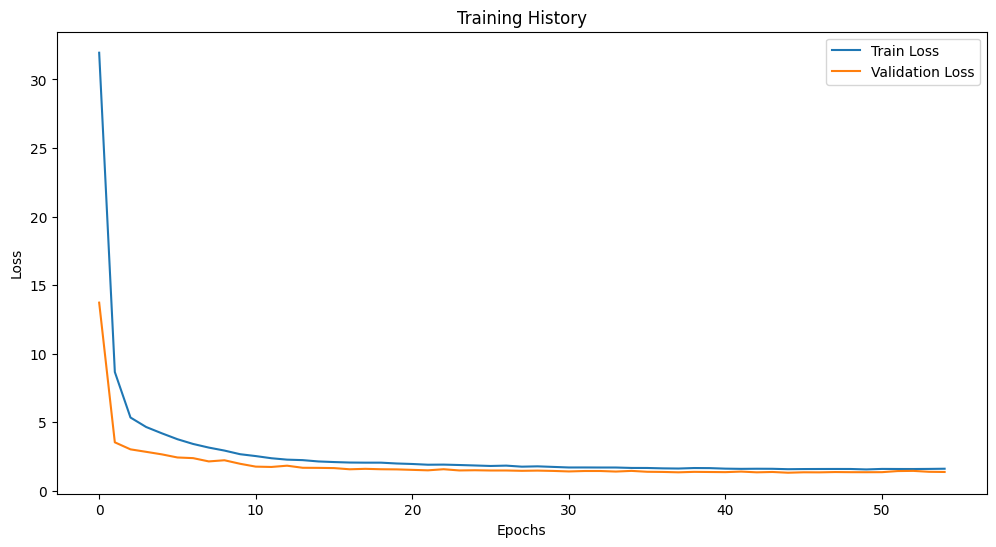

In [ ]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Training History")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.3240 - mae: 0.8190
Test Loss: 1.4213, Test MAE: 0.8363
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test RMSE: 1.0466


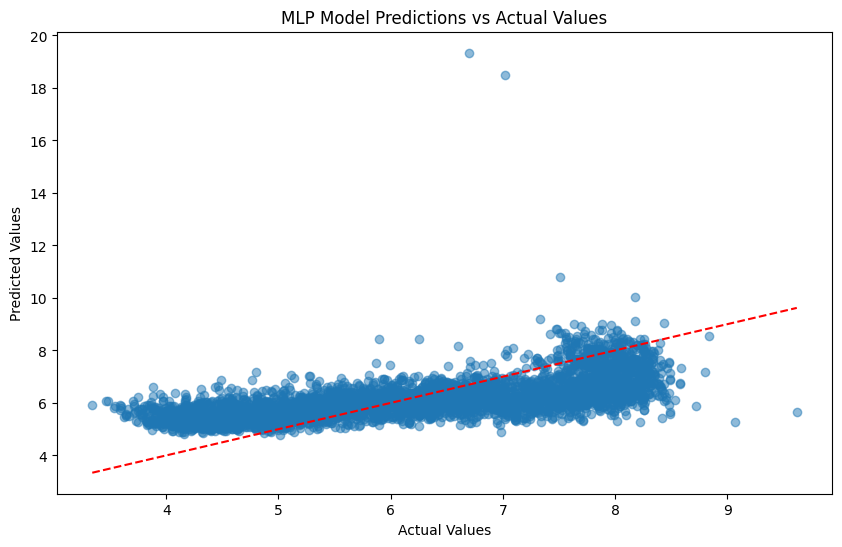

In [ ]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")
# Make predictions
y_pred = model.predict(X_test)
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse:.4f}")
# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("MLP Model Predictions vs Actual Values")
plt.show()

R2 Score: 0.3844


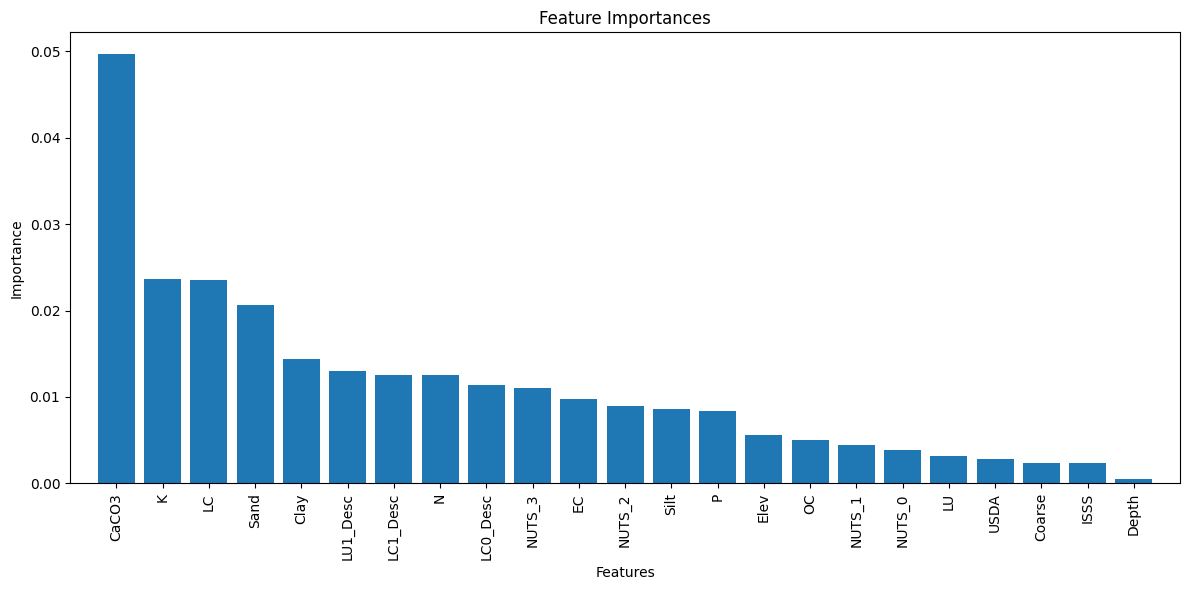

In [ ]:
# Accruacy of the model
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2:.4f}")
# Feature importance
importances = model.layers[0].get_weights()[0]
importances = np.mean(np.abs(importances), axis=1)
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]
# Plot feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()